# GDP of European Countries

The following is an analysis of serial GDP data of 18 different European countries from 1960 to 2023. The goal is to better understand which countries have been more productive over this time period, how those countries compare, and how their GDP might trend in the future.

There was no accompanying summary of this data on the Kaggle download page, aside from a note that all figures are denominated in USD. It is assumed that this dataset contains nominal GDP which has not been adjusted for inflation. This is sufficient for the purposes of this analysis.

### 1. Data Cleaning

The data was fairly simple and did not require much reformatting, aside from one function which was performed towards the end of the analysis: To spare viewers of the cumbersome scientific notation labels that sat adjascent to axis endpoints, I divided all values in the dataset by one trillion, while all axes labels are expressed in trillions.

In [935]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import warnings
warnings.simplefilter(action='ignore')


df = pd.read_csv("C:/Users/Vincent/source/repos/Bana780/Europe_GDP.csv")
Year_Array = df['Year']
df = df.drop(columns = 'Year')
df = df/1000000000000
pd.options.display.float_format = '{:,.12f}'.format
df['Year'] = Year_Array
Countries = df.columns.drop("Year").to_list()

### 2. Investigation

There are several inclinations I can posit at the outset of this journey. I know something of the histories and characteristics of these several countries; the United Kingdom, particularly because of London, is arguably the only economy that can rival New York as the financial capital of the world. In contrast, Greece has been mired with economic problems since its credit downgrading circa 2009. Spain and Italy have high unemployment rates. Germany is sterotypically efficient and punctual. France remains a fashion and arts center for the world. Will any of these assertions be borne out in the data?

My first look at this dataset visually will attempt to show which country has the largest economy in terms of GDP today (as of 2023). A simple bar chart can accomplish this. I added a horizontal line to represent the average GDP of all countries in the dataset.

Text(3.0, 1.3547065577059443, 'Mean GDP of all Selected Countries')

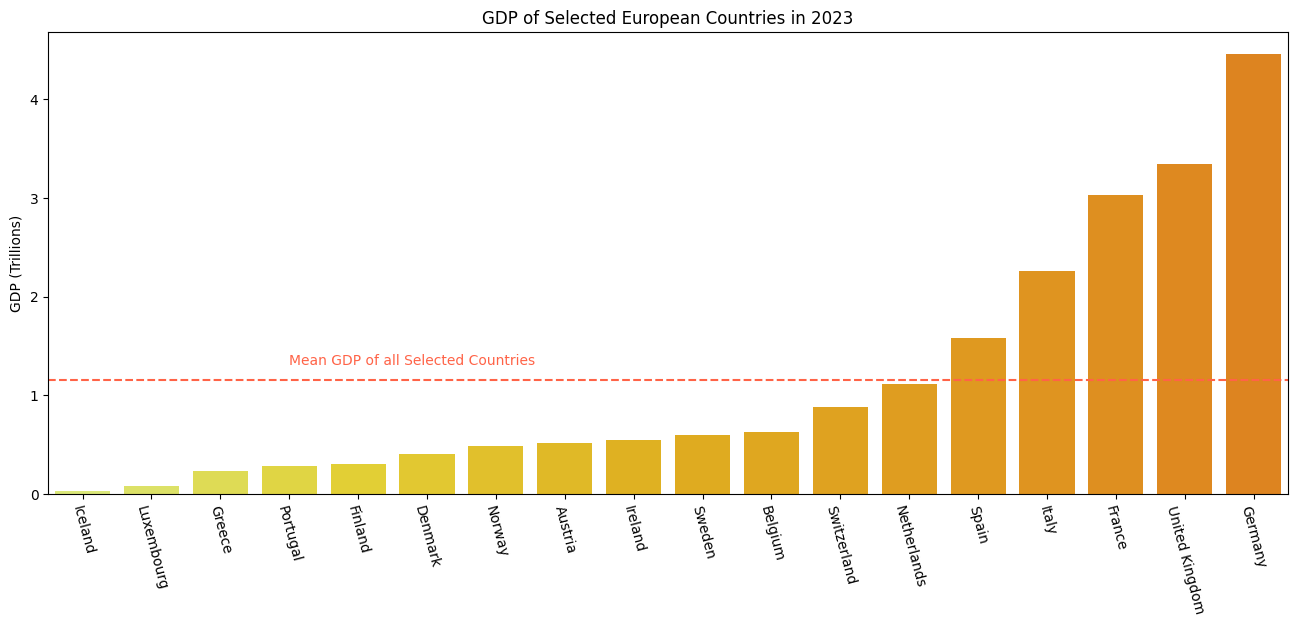

In [936]:
df3 = df.loc[63:63].drop("Year", axis=1)
year_2023_sorted = df3.sort_values(by=63, axis=1, ascending=True)
GDP_Average = df3.mean(axis=1).at[63]

plt.figure(figsize=(16, 6))
plt.xticks(rotation=-75, ha = "center")
plt.title("GDP of Selected European Countries in 2023")
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
sns.barplot(year_2023_sorted, palette="Wistia")
plt.ylabel('GDP (Trillions)')
plt.axhline(y = GDP_Average, color='tomato', linestyle='--')
plt.text(x=(len(year_2023_sorted.columns)/2)-6, y= (GDP_Average + .2), s='Mean GDP of all Selected Countries', color='tomato', va='center')

This chart indicates that there are five European countries with above-average productivity for the continent. Germany is by far the biggest economy. The United Kingdom, France, Italy, and Spain are also productive, but diminish noticably in sequence. Countries don't begin to be evenly matched until the range from belgium to Denmark is reached. Iceland and Luxembourg are, understandably, the least productive members of the dataset.

I want to know more about how these economies performed over time. Another bar chart should be able to easily visually compare the scales of these countries' economies 63 years apart.

Text(0, 0.5, 'GDP (Trillions)')

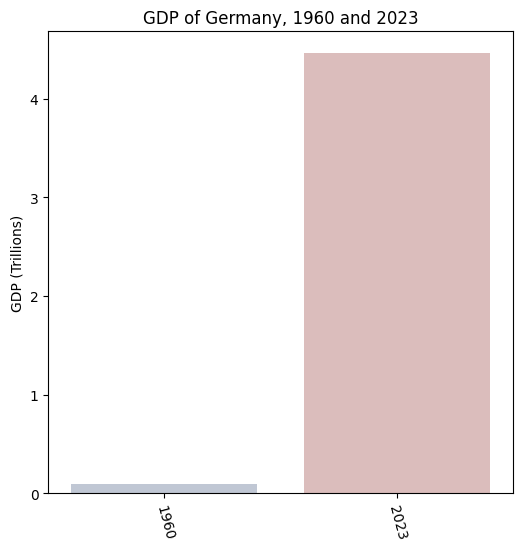

In [937]:
Germany = df[["Germany"]].loc[1:1].rename(columns = {"Germany":"1960"})
Germany[["2023"]] = df[["Germany"]].loc[63]
plt.figure(figsize=(6, 6))
plt.xticks(rotation=-75, ha = "center")
plt.title("GDP of Germany, 1960 and 2023")
sns.barplot(Germany, palette="vlag")
plt.ylabel('GDP (Trillions)')

Text(0, 0.5, 'GDP (Trillions)')

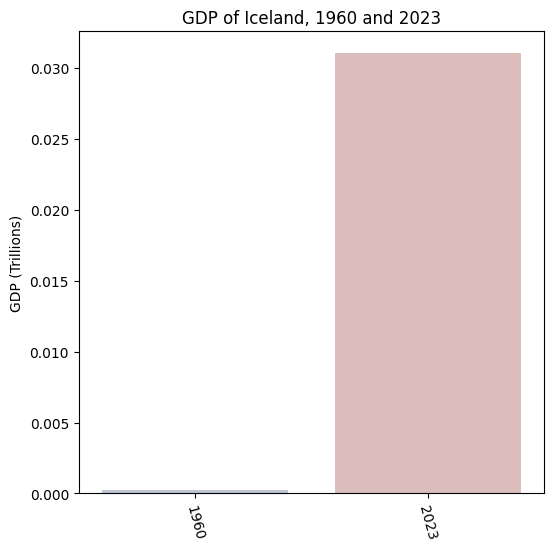

In [938]:
Iceland = df[["Iceland"]].loc[1:1].rename(columns = {"Iceland":"1960"})
Iceland[["2023"]] = df[["Iceland"]].loc[63]
plt.figure(figsize=(6, 6))
plt.xticks(rotation=-75, ha = "center")
plt.title("GDP of Iceland, 1960 and 2023")
sns.barplot(Iceland, palette="vlag")
plt.ylabel('GDP (Trillions)')

These charts contribute to one's sense of scale of economic growth over the past 63 years. The difference is very stark. Surprisingly, the growth in Iceland was apparently more rapid than that of Germany, but this probably means little considering their economy is still denominated in Billions, not Trillions. Perhaps their growth is due to the exporting of natural energy resouorces, in contrast to Germany's manufacturing and engineering services.

Next is a line graph showing the history of each country's output over time. A line graph will communicate all of the ups and downs of each economy.

Text(0.5, 1.0, 'GDP of All European Economies')

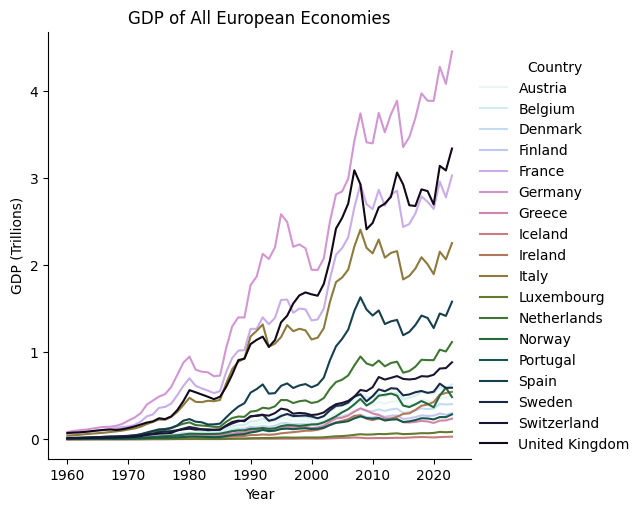

In [939]:
df_melted = df.melt(id_vars = "Year", value_vars = Countries)
df_melted = df_melted.rename(columns = {'variable':'Country'})
sns.relplot(df_melted, x = "Year", y = 'value', hue = 'Country', kind = "line", palette = "cubehelix_r")
plt.xlabel('Year')
plt.ylabel('GDP (Trillions)')
plt.title('GDP of All European Economies')

Again, Germany is clearly the largest economy of the selected countries. The two smallest countries, Luxembourg and Iceland, appear not to have grown at all. We know that's not true because of the last exercise involving bar charts. However, the fact that these economies appear flat here gives us a sense of scale between the largest and smallest economies of Europe, even if the chart, overall, is crowded.

It may be helpful to pair down my data from here on out. Let's just look at the four largest economies again on a line graph, and omit everything else.

Text(0.5, 1.0, 'GDP of Top Four European Economies')

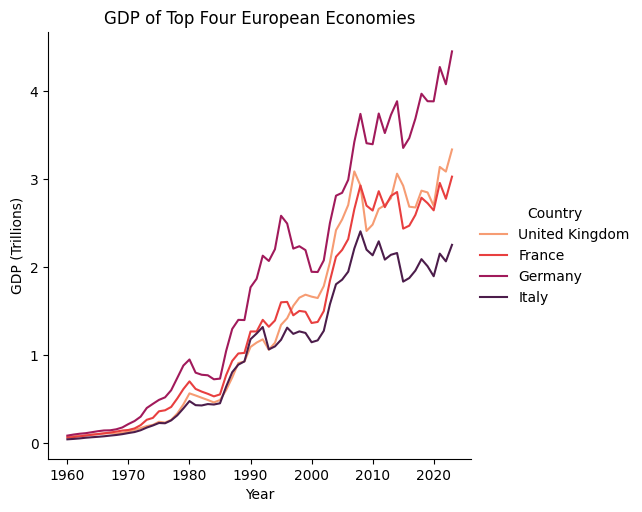

In [940]:
df2 = df[['Year', 'United Kingdom', 'France', 'Germany', 'Italy']]
df2_melted = df2.melt(id_vars = "Year", value_vars = ['United Kingdom', 'France', 'Germany', 'Italy'])
df2_melted = df2_melted.rename(columns = {'variable':'Country'})
sns.relplot(df2_melted, x = "Year", y = 'value', hue = 'Country', kind = "line", palette = "rocket_r")
plt.xlabel('Year')
plt.ylabel('GDP (Trillions)')
plt.title('GDP of Top Four European Economies')

This vindicates earlier observations that Germany, the United Kingdom, France, and Italy are the largest economies of Europe. What I find interesting is that there hasn't been that much trading places over the 63 years of GDP growth present in the data. Italy was more roughly matched with France and the UK in the late 80's and early 90's, but since then, all four economies have been clearly stratified, with France and the UK being the most closely related. I wonder how myuch of this has to do with international relations like trade and EU membership, and how much has to do with domestic policies like taxation and public investment.

Maybe fitting these lines to a regression model can help us see why these economies are the way they are. The following displays each line individually overlaid with a polynomial best fit (dashed tan line).

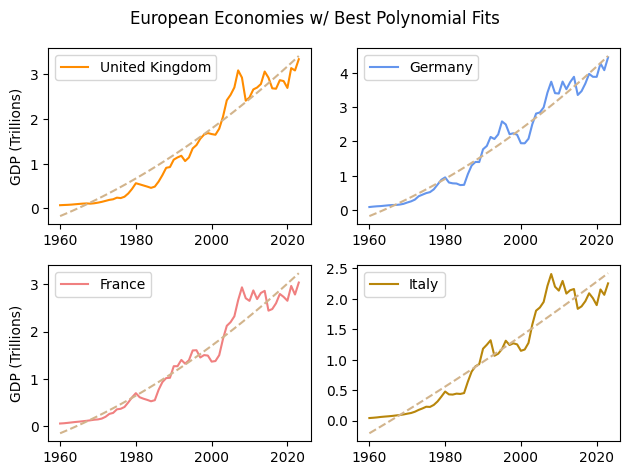

In [943]:
fig = plt.figure(16)
x_yr = np.array(df["Year"].tolist())

#Creating GDP lines and their polynomial fits
y_uk = df[['United Kingdom']]; y_gr = df[['Germany']]; y_fr = df[['France']]; y_it = df[['Italy']];
coeffs_uk = np.polyfit(x_yr, y_uk, 2); coeffs_gr = np.polyfit(x_yr, y_gr, 2); coeffs_fr = np.polyfit(x_yr, y_fr, 2); coeffs_it = np.polyfit(x_yr, y_it, 2);
x_fit_uk = np.linspace(x_yr.min(), x_yr.max(), 100); x_fit_gr = np.linspace(x_yr.min(), x_yr.max(), 100); x_fit_fr = np.linspace(x_yr.min(), x_yr.max(), 100); x_fit_it = np.linspace(x_yr.min(), x_yr.max(), 100); 
y_fit_uk = np.polyval(coeffs_uk, x_fit_uk); y_fit_gr = np.polyval(coeffs_gr, x_fit_gr); y_fit_fr = np.polyval(coeffs_fr, x_fit_fr); y_fit_it = np.polyval(coeffs_it, x_fit_it);

# Add a subplot at position 1 (upper left)
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(x_yr, y_uk, 'darkorange', label = 'United Kingdom')
ax1.plot(x_fit, y_fit, 'tan', linestyle = '--')
ax1.set_ylabel('GDP (Trillions)')
plt.legend()

# Add a subplot at position 2 (upper right)
ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(x_yr, y_gr, 'cornflowerblue', label = 'Germany')
ax2.plot(x_fit_gr, y_fit_gr, 'tan', linestyle = '--')
plt.legend()

# Add a subplot at position 3 (lower left)
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(x_yr, y_fr, 'lightcoral', label = 'France')
ax3.plot(x_fit_fr, y_fit_fr, 'tan', linestyle = '--')
ax3.set_ylabel('GDP (Trillions)')
plt.legend()

# Add a subplot at position 4 (lower right)
ax4 = fig.add_subplot(2, 2, 4)
ax4.plot(x_yr, y_it, 'darkgoldenrod', label = 'Italy')
ax4.plot(x_fit_it, y_fit_it, 'tan', linestyle = '--')
ax4.ticklabel_format(useOffset=False)
plt.legend()

fig.suptitle('European Economies w/ Best Polynomial Fits')
plt.tight_layout()
plt.show()

The biggest takeaway from this visual is that we can see reletively how well each country is doing according to its past performence. The fall in GDP of both France and Italy has left both economies below its expected output for the last several years. Germany and the UK on the otherhand, seem to ahve caught up from recent tubrulence, and are on par with where a prediction model would have them performing today.

One last regression model will fit the average of all four economies together.

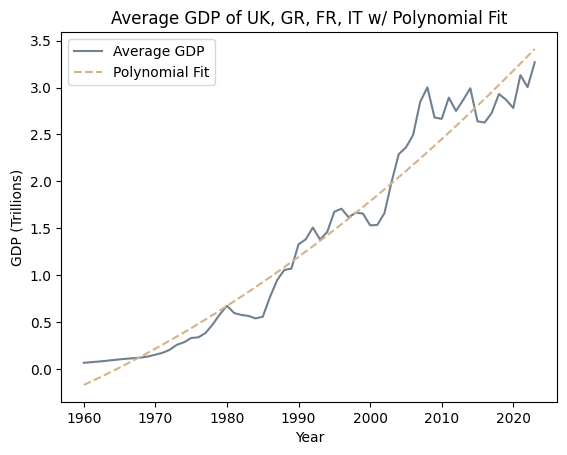

In [944]:
df5 = df[['United Kingdom', 'France', 'Germany', 'Italy']]
df5["Average"] = df5[['United Kingdom', 'France', 'Germany', 'Italy']].mean(axis=1) 
x = np.array(df["Year"].tolist())
avg = df5["Average"].tolist()

# Calculate the regression line
coeffs = np.polyfit(x, avg, 2)
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = np.polyval(coeffs, x_fit)

plt.plot(x, avg, 'slategrey', label = 'Average GDP')
plt.plot(x_fit, y_fit, 'tan', linestyle='--', label='Polynomial Fit')
plt.xlabel('Year')
plt.ylabel('GDP (Trillions)')
plt.title('Average GDP of UK, GR, FR, IT w/ Polynomial Fit')
plt.legend()
plt.show()

What I like about this figure is that we can see the parabolic nature of the growth of Europe's economy as a whole, while still observing that the economies of these nations are tied together. Economic and historical events will almost never have an impact on one country alone in a vacuum, and instead the European economy moves as an agregate. An economy moves relative to the system, but can also move the whole system; a planet that is affected by the gravitational pull of other planets changes position both relative to its neighbors, and also changes the composition of the solar system.

### 3. Conclusion

Even simple datasets can offer powerful insights if you're willing to be persistent and creative. Seeing this data viasually has helped me udnerstand more about macroeconomics, and has prompted me to think deeply about what kinds of historical events might have played significant parts in the ups and downs observed in the above graphs. I also learned that the GDP's of individual nations can never be fully extracted from the GDP ouput of a continent. As the inevitibilty of globalization becomes more palpable for industrialized nations, might we want to rethink measuring economies in a localized way? Is it worth refreshing our understanding of GDP, or looking for better ways to understand the health of an economy?